In [1]:
import numpy
from scipy import linalg

In [2]:
def lhs_operator(N, sigma):
    """
    Computes and returns the implicit operator
    of the system for the 1D diffusion equation.
    We use Crank-Nicolson method, Dirichlet condition
    on the left side of the domain and zero-gradient
    Neumann condition on the right side.
    
    Parameters
    ----------
    N : integer
        Number of interior points.
    sigma : float
        Value of alpha * dt / dx**2.
    
    Returns
    -------
    A : numpy.ndarray
        The implicit operator as a 2D array of floats
        of size N by N.
    """
    # Setup the diagonal of the operator.
    D = numpy.diag(2.0 * (1.0 + 1.0 / sigma) * numpy.ones(N))
    # Setup the Neumann condition for the last element.
    D[-1, -1] = 1.0 + 2.0 / sigma
    # Setup the upper diagonal of the operator.
    U = numpy.diag(-1.0 * numpy.ones(N - 1), k=1)
    # Setup the lower diagonal of the operator.
    L = numpy.diag(-1.0 * numpy.ones(N - 1), k=-1)
    # Assemble the operator.
    A = D + U + L
    return A

In [3]:
def rhs_vector(T, sigma, qdx):
    """
    Computes and returns the right-hand side of the system
    for the 1D diffusion equation, using a Dirichlet condition
    on the left side and a Neumann condition on the right side.
    
    Parameters
    ----------
    T : numpy.ndarray
        The temperature distribution as a 1D array of floats.
    sigma : float
        Value of alpha * dt / dx**2.
    qdx : float
        Value of the temperature flux at the right side.
    
    Returns
    -------
    b : numpy.ndarray
        The right-hand side of the system as a 1D array of floats.
    """
    b = T[:-2] + 2.0 * (1.0 / sigma - 1.0) * T[1:-1] + T[2:]
    # Set Dirichlet condition.
    b[0] += T[0]
    # Set Neumann condition.
    b[-1] += qdx
    return b

In [4]:
def crank_nicolson(T0, nt, dt, dx, alpha, q):
    """
    Computes and returns the temperature along the rod
    after a given number of time steps.
    
    The function uses Crank-Nicolson method in time,
    central differencing in space, a Dirichlet condition
    on the left side, and a Neumann condition on the
    right side.
    
    Parameters
    ----------
    T0 : numpy.ndarray
        The initial temperature distribution as a 1D array of floats.
    nt : integer
        Number of time steps to compute.
    dt : float
        Time-step size.
    dx : float
        Distance between two consecutive locations.
    alpha : float
        Thermal diffusivity of the rod.
    q : float
        Value of the temperature gradient on the right side.
    
    Returns
    -------
    T : numpy.ndarray
        The temperature distribution as a 1D array of floats.
    """
    sigma = alpha * dt / dx**2
    # Create the implicit operator of the system.
    A = lhs_operator(len(T0) - 2, sigma)
    # Integrate in time.
    T = T0.copy()
    for n in range(nt):
        # Generate the right-hand side of the system.
        b = rhs_vector(T, sigma, q * dx)
        # Solve the system with scipy.linalg.solve.
        T[1:-1] = linalg.solve(A, b)
        # Apply the Neumann boundary condition.
        T[-1] = T[-2] + q * dx
    return T

In [5]:
# Set parameters.
L = 1.0  # length of the rod
nx = 21  # number of points on the rod
dx = L / (nx - 1)  # grid spacing
alpha = 1.22e-3  # thermal diffusivity of the rod
q = 0.0  # temperature gradient at the extremity

# Define the locations on the rod.
x = numpy.linspace(0.0, L, num=nx)

# Set the initial temperature distribution.
T0 = numpy.zeros(nx)
T0[0] = 100.0


In [6]:
A = lhs_operator(nx - 1, 0.5)
print(A)

[[ 6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [-1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.

In [7]:
# Set the time-step size based on CFL limit.
sigma = 0.5
dt = sigma * dx**2 / alpha  # time-step size
nt = 10  # number of time steps to compute

# Compute the temperature distribution.
T = crank_nicolson(T0, nt, dt, dx, alpha, q)

In [8]:
from matplotlib import pyplot
%matplotlib inline

In [9]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

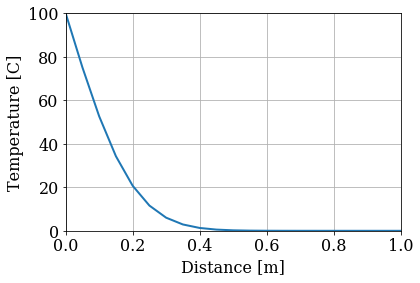

In [10]:
# Plot the temperature along the rod.
pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('Distance [m]')
pyplot.ylabel('Temperature [C]')
pyplot.grid()
pyplot.plot(x, T, color='C0', linestyle='-', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 100.0);

In [11]:
def analytical_temperature(x, t, alpha, L, N):
    """
    Computes and returns a truncated approximation
    of the exact temperature distribution along the rod.
    
    Parameters
    ----------
    x : numpy.ndarray
        Locations at which to calculate the temperature
        as a 1D array of floats.
    t : float
        Time.
    alpha : float
        Thermal diffusivity of the rod.
    L : float
        Length of the rod.
    N : integer
        Number of terms to use in the expansion.
    
    Returns
    -------
    T : numpy.ndarray
        The truncated analytical temperature distribution
        as a 1D array of floats.
    """
    T = 100.0 * numpy.ones_like(x)
    for n in range(1, N + 1):
        k = (2 * n - 1) * numpy.pi / (2.0 * L)
        T -= (400.0 / (2.0 * L * k) *
              numpy.sin(k * x) * numpy.exp(- alpha * k**2 * t))
    return T

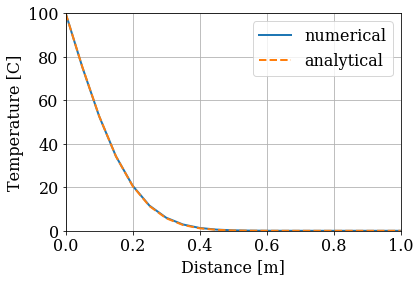

In [12]:
# Compute the analytical temperature distribution.
T_exact = analytical_temperature(x, nt * dt, alpha, L, 100)

# Plot the numerical and analytical temperatures.
pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('Distance [m]')
pyplot.ylabel('Temperature [C]')
pyplot.grid()
pyplot.plot(x, T, label='numerical',
            color='C0', linestyle='-', linewidth=2)
pyplot.plot(x, T_exact, label='analytical',
            color='C1', linestyle='--', linewidth=2)
pyplot.legend()
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 100.0);

In [13]:
T1 = analytical_temperature(x, 0.2, alpha, L, 100)
T2 = analytical_temperature(x, 0.2, alpha, L, 200)
numpy.sqrt(numpy.sum((T1 - T2)**2) / numpy.sum(T2**2))

6.927917118260093e-13

In [14]:
def l2_error(T, T_exact):
    """
    Computes and returns the relative L2-norm
    of the difference between the numerical solution
    and the exact solution.
    
    Parameters
    ----------
    T : numpy.ndarray
        The numerical solution as an array of floats.
    T_exact : numpy.ndarray
        The exact solution as an array of floats.
    
    Returns
    -------
    error : float
        The relative L2-norm of the difference.
    """
    error = numpy.sqrt(numpy.sum((T - T_exact)**2) /
                       numpy.sum(T_exact**2))
    return error

In [15]:
def lhs_operator_btcs(N, sigma):
    """
    Computes and returns the implicit operator
    of the system for the 1D diffusion equation.
    We use backward Euler method, Dirichlet condition
    on the left side of the domain and zero-gradient
    Neumann condition on the right side.
    
    Parameters
    ----------
    N : integer
        Number of interior points.
    sigma : float
        Value of alpha * dt / dx**2.
    
    Returns
    -------
    A : numpy.ndarray
        The implicit operator as a 2D array of floats
        of size N by N.
    """
    # Setup the diagonal of the operator.
    D = numpy.diag((2.0 + 1.0 / sigma) * numpy.ones(N))
    # Setup the Neumann condition for the last element.
    D[-1, -1] = 1.0 + 1.0 / sigma
    # Setup the upper diagonal of the operator.
    U = numpy.diag(-1.0 * numpy.ones(N - 1), k=1)
    # Setup the lower diagonal of the operator.
    L = numpy.diag(-1.0 * numpy.ones(N - 1), k=-1)
    # Assemble the operator.
    A = D + U + L
    return A

In [16]:
def rhs_vector_btcs(T, sigma, qdx):
    """
    Computes and returns the right-hand side of the system
    for the 1D diffusion equation, using a Dirichlet condition
    on the left side and a Neumann condition on the right side.
    
    Parameters
    ----------
    T : numpy.ndarray
        The temperature distribution as a 1D array of floats.
    sigma : float
        Value of alpha * dt / dx**2.
    qdx : float
        Value of the temperature flux at the right side.
    
    Returns
    -------
    b : numpy.ndarray
        The right-hand side of the system as a 1D array of floats.
    """
    b = T[1:-1] / sigma
    # Set Dirichlet condition.
    b[0] += T[0]
    # Set Neumann condition.
    b[-1] += qdx
    return b

In [17]:
def btcs_implicit(T0, nt, dt, dx, alpha, q):
    """
    Computes and returns the temperature along the rod
    after a given number of time steps.
    
    The function uses Euler implicit in time,
    central differencing in space, a Dirichlet condition
    on the left side, and a Neumann condition on the
    right side.
    
    Parameters
    ----------
    T0 : numpy.ndarray
        The initial temperature distribution
        as a 1D array of floats.
    nt : integer
        Number of time steps to compute.
    dt : float
        Time-step size.
    dx : float
        Distance between two consecutive locations.
    alpha : float
        Thermal diffusivity of the rod.
    q : float
        Value of the temperature gradient on the right side.
    
    Returns
    -------
    T : numpy.ndarray
        The temperature distribution as a 1D array of floats.
    """
    sigma = alpha * dt / dx**2
    # Create the implicit operator of the system.
    A = lhs_operator_btcs(len(T0) - 2, sigma)
    # Integrate in time.
    T = T0.copy()
    for n in range(nt):
        # Generate the right-hand side of the system.
        b = rhs_vector_btcs(T, sigma, q * dx)
        # Solve the system with scipy.linalg.solve.
        T[1:-1] = linalg.solve(A, b)
        # Apply the Neumann boundary condition.
        T[-1] = T[-2] + q * dx
    return T

In [18]:
# Update parameters.
nx = 1001  # number of points on the rod
dx = L / (nx - 1)  # grid spacing

# Define the locations on the rod.
x = numpy.linspace(0.0, L, num=nx)

# Create a list with the time-step sizes to use.
dt_values = [1.0, 0.5, 0.25, 0.125]

# Create empty lists to hold the errors for both schemes.
errors = []
errors_btcs = []

# Compute the initial temperature distribution at t=1.0.
t0 = 1.0
T0 = analytical_temperature(x, t0, alpha, L, 100)

# Compute the final analytical temperature at t=10.0.
t = 10.0
T_exact = analytical_temperature(x, t, alpha, L, 100)

# Compute the numerical solutions and errors.
for dt in dt_values:
    nt = int((t - t0) / dt)  # number of time steps
    # Compute the solution using Crank-Nicolson scheme.
    T = crank_nicolson(T0, nt, dt, dx, alpha, q)
    # Compute and record the L2-norm of the error.
    errors.append(l2_error(T, T_exact))
    # Compute the solution using implicit BTCS scheme.
    T = btcs_implicit(T0, nt, dt, dx, alpha, q)
    # Compute and record the L2-norm of the error.
    errors_btcs.append(l2_error(T, T_exact))

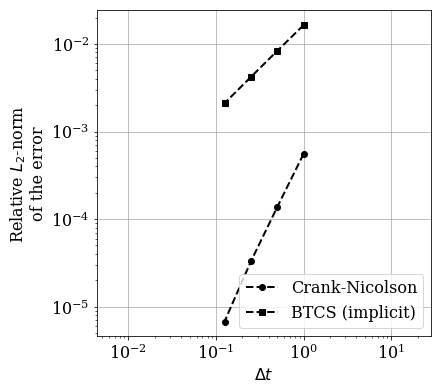

In [19]:
# Plot the error versus the time-step size.
pyplot.figure(figsize=(6.0, 6.0))
pyplot.grid()
pyplot.xlabel(r'$\Delta t$')
pyplot.ylabel('Relative $L_2$-norm\nof the error')
pyplot.loglog(dt_values, errors, label='Crank-Nicolson',
              color='black', linestyle='--', linewidth=2, marker='o')
pyplot.loglog(dt_values, errors_btcs, label='BTCS (implicit)',
              color='black', linestyle='--', linewidth=2, marker='s')
pyplot.legend()
pyplot.axis('equal');

In [20]:
errors

[0.0005562525604234885,
 0.00013745756447740593,
 3.285170428463535e-05,
 6.771647468652634e-06]

In [21]:
# Set parameters.
dt = 0.1  # time-step size
t = 20.0  # final time
nt = int(t / dt)  # number of time steps to compute

# Create a list with the grid-spacing sizes to use.
nx_values = [11, 21, 41, 81, 161]

# Create an empty list to store the errors.
errors = []

# Compute the numerical solutions and errors.
for nx in nx_values:
    dx = L / (nx - 1)  # grid spacing
    x = numpy.linspace(0.0, L, num=nx)  # grid points
    # Set the initial conditions for the grid.
    T0 = numpy.zeros(nx)
    T0[0] = 100.0
    # Compute the solution using Crank-Nicolson scheme.
    T = crank_nicolson(T0, nt, dt, dx, alpha, q)
    # Compute the analytical solution.
    T_exact = analytical_temperature(x, t, alpha, L, 100)
    # Compute and record the L2-norm of the error.
    errors.append(l2_error(T, T_exact))

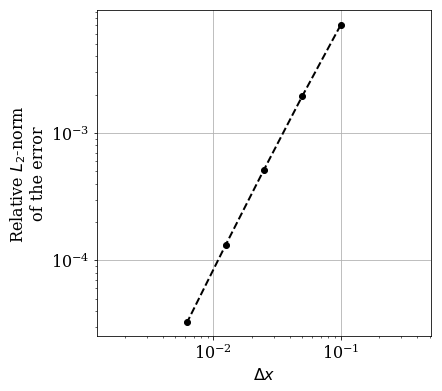

In [ ]:
# Plot the error versus the grid-spacing size.
pyplot.figure(figsize=(6.0, 6.0))
pyplot.grid()
pyplot.xlabel(r'$\Delta x$')
pyplot.ylabel('Relative $L_2$-norm\nof the error')
dx_values = L / (numpy.array(nx_values) - 1)
pyplot.loglog(dx_values, errors,
              color='black', linestyle='--', linewidth=2, marker='o')
pyplot.axis('equal');

In [ ]:
# Set parameters.
dt = 0.1  # time-step size
t = 1000.0  # final time
nt = int(t / dt)  # number of time steps to compute

# Create a list with the grid-spacing sizes to use.
nx_values = [11, 21, 41, 81, 161]

# Create an empty list to store the errors.
errors = []

# Compute the numerical solutions and errors.
for nx in nx_values:
    dx = L / (nx - 1)  # grid spacing
    x = numpy.linspace(0.0, L, num=nx)  # grid points
    # Set the initial conditions for the grid.
    T0 = numpy.zeros(nx)
    T0[0] = 100.0
    # Compute the solution using Crank-Nicolson scheme.
    T = crank_nicolson(T0, nt, dt, dx, alpha, q)
    # Compute the analytical solution.
    T_exact = analytical_temperature(x, t, alpha, L, 100)
    # Compute and record the L2-norm of the error.
    errors.append(l2_error(T, T_exact))

In [ ]:
# Plot the error versus the grid-spacing size.
pyplot.figure(figsize=(6.0, 6.0))
pyplot.grid()
pyplot.xlabel(r'$\Delta x$')
pyplot.ylabel('Relative $L_2$-norm\nof the error')
dx_values = L / (numpy.array(nx_values) - 1)
pyplot.loglog(dx_values, errors,
              color='black', linestyle='--', linewidth=2, marker='o')
pyplot.axis('equal');

In [ ]:
errors